In [1]:
from ISLP import load_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Linear_regression():
    def __init__(self):
        self.A = None
        self.B = None
    
    def fit(self, x, y):
        x = np.array(x , dtype = float)
        y = np.array(y , dtype = float)
        x_mean = np.mean(x)
        y_mean = np.mean(y)
        S = 0
        R = 0 
        for i,j in zip(x,y):
            S += (i- x_mean)*(j- y_mean)
            R += (i-x_mean)**2
        if R==0:
            raise ValueError("Variance is zero, it can't be zero if model is to be fitted")
        self.B = S/R
        self.A = y_mean - (self.B * x_mean)

    def predict(self , x): 
        if self.A is None or self.B is None:
            raise ValueError("model not fitted")
        x = np.array(x , dtype = float)
        return self.A + (self.B * x)

    def RSS(self, x, y):
        y = np.array(y , dtype = float)
        y_pred = self.predict(x)
        return np.sum((y - y_pred)**2)
    def mse(self, x,y ):
        Y = np.array(y , dtype = float)
        n = Y.size
        return (1/n)*self.RSS(x,y)
    def R2(self, x, y):
        y= np.array(y ,dtype =float)
        y_mean = y.mean()
        TSS = np.sum((y - y_mean)**2)
        return (1- (self.RSS(x,y)/TSS))

    def RSE(self, x, y):
        y=  np.array(y , dtype = float)
        n = y.size
        rss = self.RSS(x,y)
        return np.sqrt(rss/(n-2))
    

In [3]:
df = pd.read_csv("Advertising.csv")

In [4]:
df.info

<bound method DataFrame.info of      Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [5]:
df.describe()


,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
df.drop(columns='Unnamed: 0' , inplace = True)

In [7]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [8]:
df.dtypes


TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [9]:
x = df['TV'].values
y = df['sales'].values

In [10]:
model = Linear_regression()

In [11]:
model.fit(x, y)

In [12]:
model.A
model.B

np.float64(0.04753664043301969)

In [23]:
y_prediction = model.predict(x)

In [19]:
print(model.mse(x,y))
print(model.R2(x,y))
print(model.RSS(x,y))
print(model.RSE(x,y))

10.512652915656759
0.611875050850071
2102.5305831313517
3.258656368650463


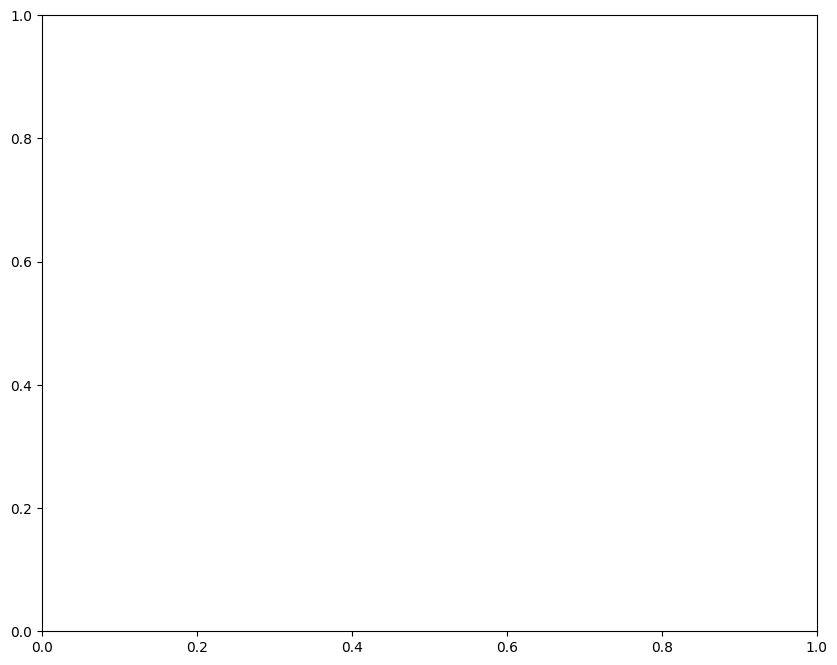

In [14]:
fig, ax = plt.subplots(figsize=(10,8))

In [15]:
ax.scatter(x, y)
ax.plot(x, y_prediction)

In [16]:
plt.show()

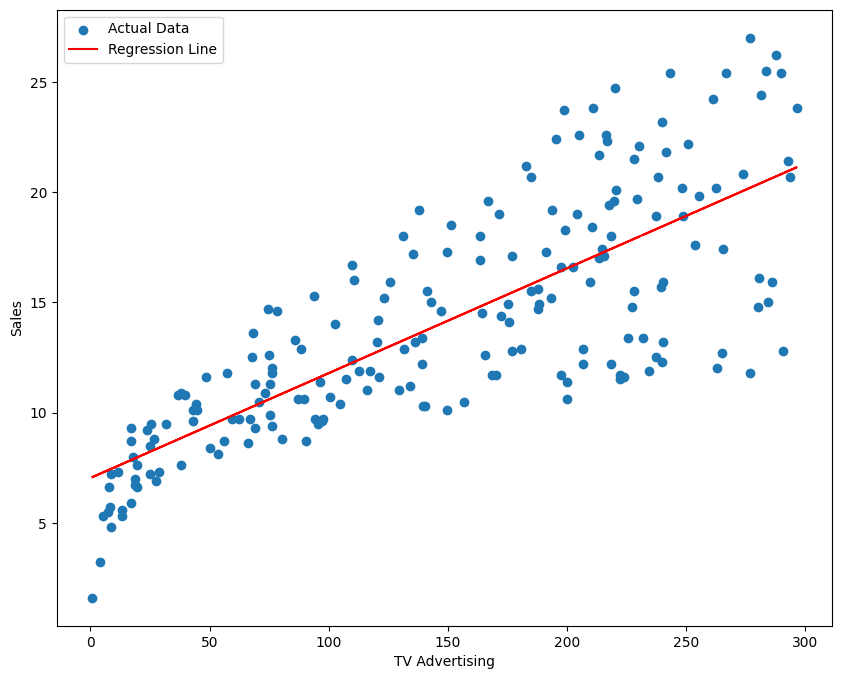

In [17]:
fig, ax = plt.subplots(figsize=(10, 8))

# Actual data
ax.scatter(x, y, label="Actual Data")

# Regression line
ax.plot(x, y_prediction, color="red", label="Regression Line")

ax.set_xlabel("TV Advertising")
ax.set_ylabel("Sales")
ax.legend()

plt.show()


In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
sklearn_model = LinearRegression()

In [26]:
X = df[['TV']]
Y = df['sales']

In [27]:
sklearn_model.fit(X,Y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [35]:
print(sklearn_model.coef_)
print(sklearn_model.intercept_)
print(f"{model.A} vs {sklearn_model.intercept_}")
print(f"{model.B} vs {sklearn_model.coef_}")
print(sklearn_model.score(X,Y))

[0.04753664]
7.032593549127695
7.032593549127704 vs 7.032593549127695
0.04753664043301969 vs [0.04753664]
0.611875050850071
